In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
print(os.listdir("D:\MHM\resource\Supermarket\dataset"))

['supermarket_sales - Sheet1.csv']


In [3]:
sales = pd.read_csv('D:\MHM\resource\Supermarket\dataset/supermarket_sales - Sheet1.csv')

In [4]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [6]:
### By inspection, the 'Date' datatype is an object, we need to change it to datetime

sales['Date'] = pd.to_datetime(sales['Date'])

In [7]:
sales['Date'].dtype

dtype('<M8[ns]')

In [8]:
type(sales['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
sales['Date'][0]

Timestamp('2019-01-05 00:00:00')

In [10]:
### lets featch some derived attributes from Date as day,month,year

sales['day'] = (sales['Date']).dt.day
sales['month'] = (sales['Date']).dt.month
sales['year'] = (sales['Date']).dt.year


In [11]:
sales['Time'].dtype

dtype('O')

In [12]:
## similarly u have to convert Time into some date-time format

sales['Time'] = pd.to_datetime(sales['Time'])
sales['Hour'] = (sales['Time']).dt.hour 

In [13]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.220360e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000
day,1000.0,15.256000,8.693563e+00,1.000000,8.000000,15.000000,23.000000,31.000000
month,1000.0,1.993000,8.352536e-01,1.000000,1.000000,2.000000,3.000000,3.000000


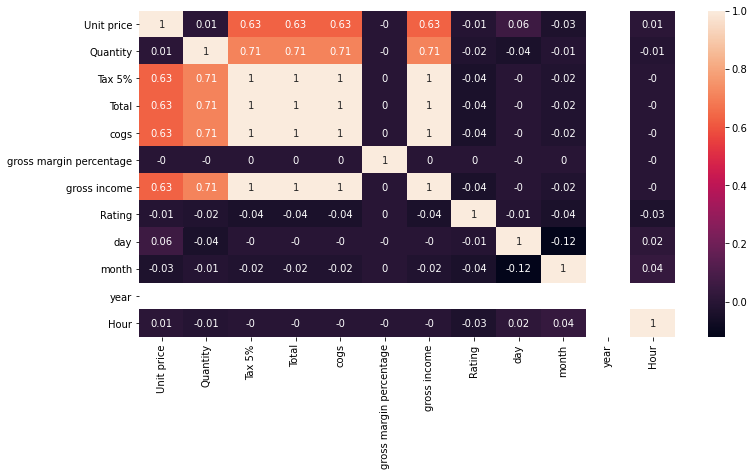

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(np.round(sales.corr(),2),annot=True)
plt.show()

In [15]:
### The best correlated are Tax 5%, Total, Gross Income and cogs i.e Cost of Goods sold with a correlation of 1.

### Also, the above mentioned all has a good correlation of 0.71 with Quantity

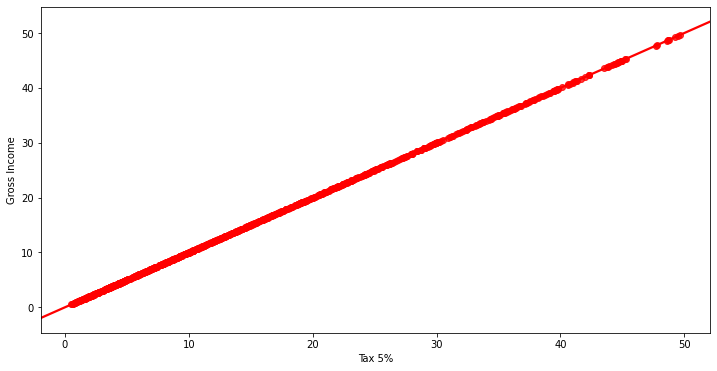

In [16]:
plt.figure(figsize=(12,6))
sns.regplot(x='Tax 5%',y='gross income',data=sales,color='Red')
plt.xlabel('Tax 5%')
plt.ylabel('Gross Income')
plt.show()


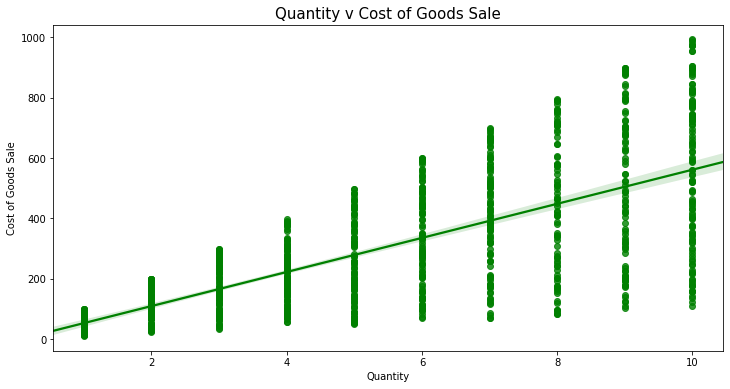

In [17]:
plt.figure(figsize=(12,6))
sns.regplot(x='Quantity',y='cogs',data=sales,color='green')
plt.xlabel('Quantity')
plt.ylabel('Cost of Goods Sale')
plt.title('Quantity v Cost of Goods Sale',fontsize=15)
plt.show()

### To find Mean Rating

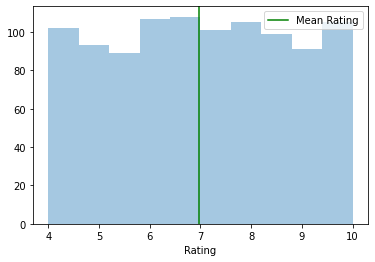

In [18]:
plt.figure()
sns.distplot(sales['Rating'],kde=False)
##plt.axis_vertical_line
plt.axvline(x=np.mean(sales['Rating']),c='green',label='Mean Rating')
plt.legend()
plt.show()


In [19]:
cat_columns = [col for col in sales.columns if sales[col].dtype == "object"]


In [20]:
for col in cat_columns:
    print('{} has unique values: {} '.format(col,sales[col].nunique()))

Invoice ID has unique values: 1000 
Branch has unique values: 3 
City has unique values: 3 
Customer type has unique values: 2 
Gender has unique values: 2 
Product line has unique values: 6 
Payment has unique values: 3 


In [21]:
def countplot(column,hue_name=None):
    return sns.countplot(x=column, data =sales,hue=hue_name)

In [22]:
def boxplot(x_column,y_column):
    sns.boxplot(x=x_column, y = y_column ,data =sales)

In [23]:
def lineplot(x_column, y_column):
    sns.lineplot(x=x_column,  y = y_column,data =sales)

In [24]:
def rel_plot(x_col, y_col, col_name=None, row_name=None, rel_type=None, hue_name=None, style_name=None):
    return sns.relplot(x=x_col, y =y_col, col=col_name , row=row_name, kind=rel_type, hue=hue_name, style=style_name, data =sales)

###  Find distribution of each & every branch

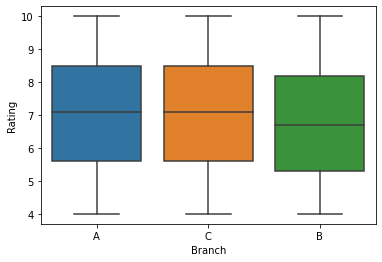

In [25]:
boxplot('Branch','Rating')

In [26]:
### Branch B has the lowest rating among all the branches

#### Sales by the hour Analysis

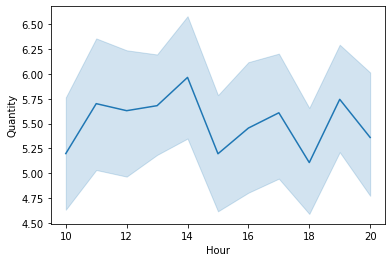

In [27]:
lineplot('Hour','Quantity')

In [28]:
#### Conclusion--->>  Most of the item were sold around 14:00 hrs local time

### how much sales occurs in each & every branch with respect to each & every month

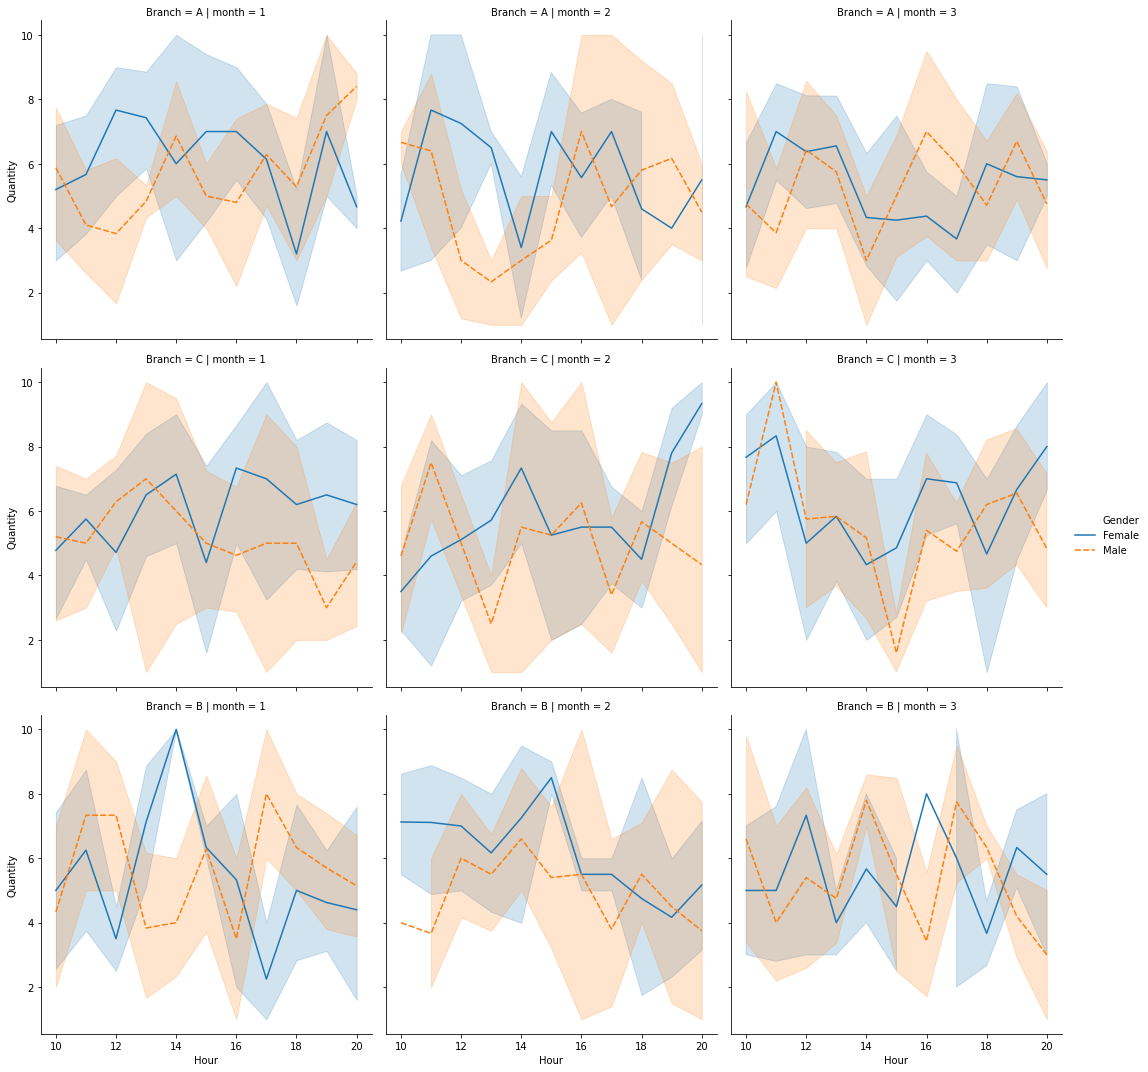

In [29]:
rel_plot(x_col="Hour",y_col='Quantity', col_name='month' ,row_name='Branch', rel_type="line", hue_name="Gender", style_name="Gender")

### Analysing branch's sales per hour in a monthly fashion

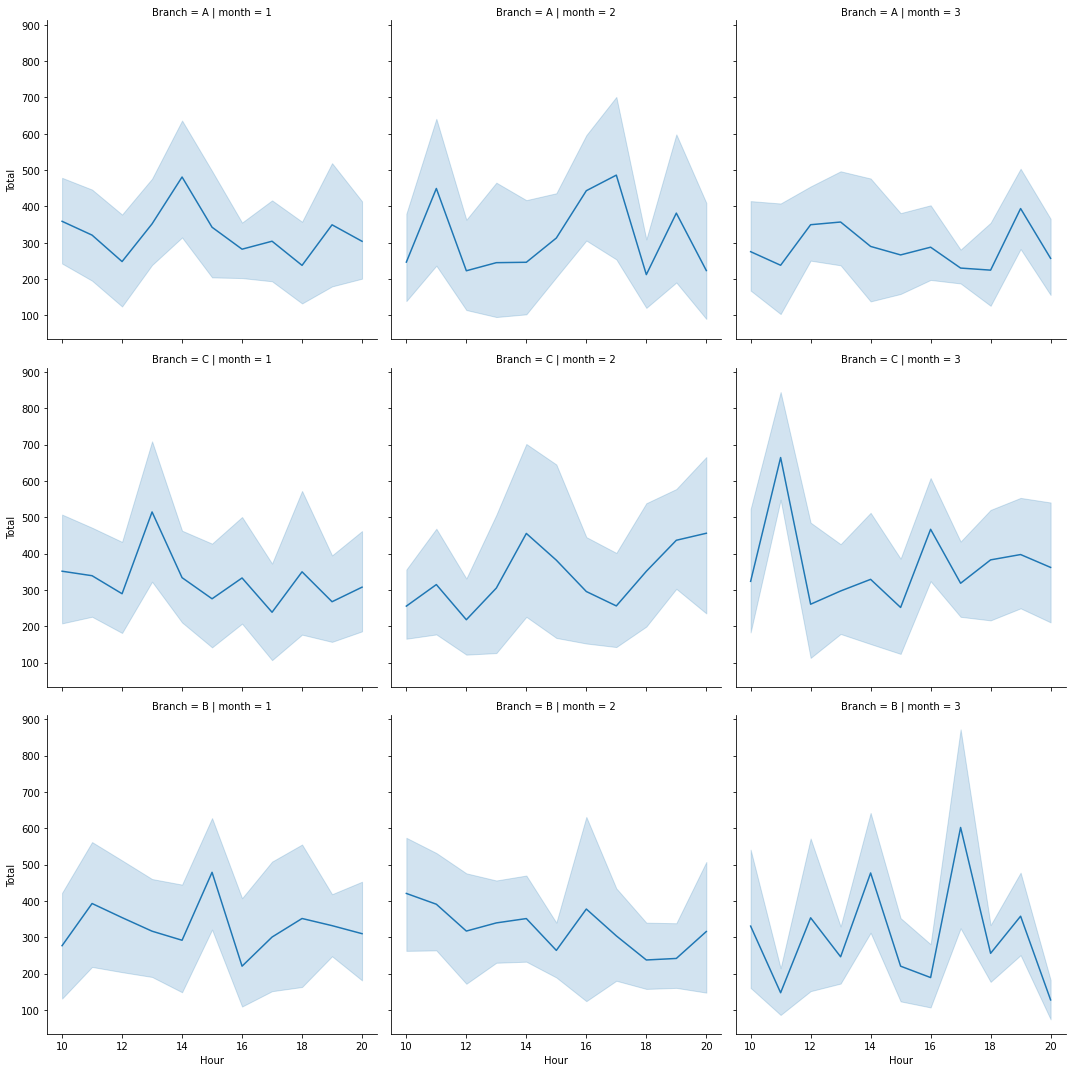

In [30]:
rel_plot(x_col="Hour",  y_col= 'Total', col_name= 'month' , row_name= 'Branch', rel_type="line")

### Let's see when customers buy certain products in the various branches.

<Figure size 1440x864 with 0 Axes>

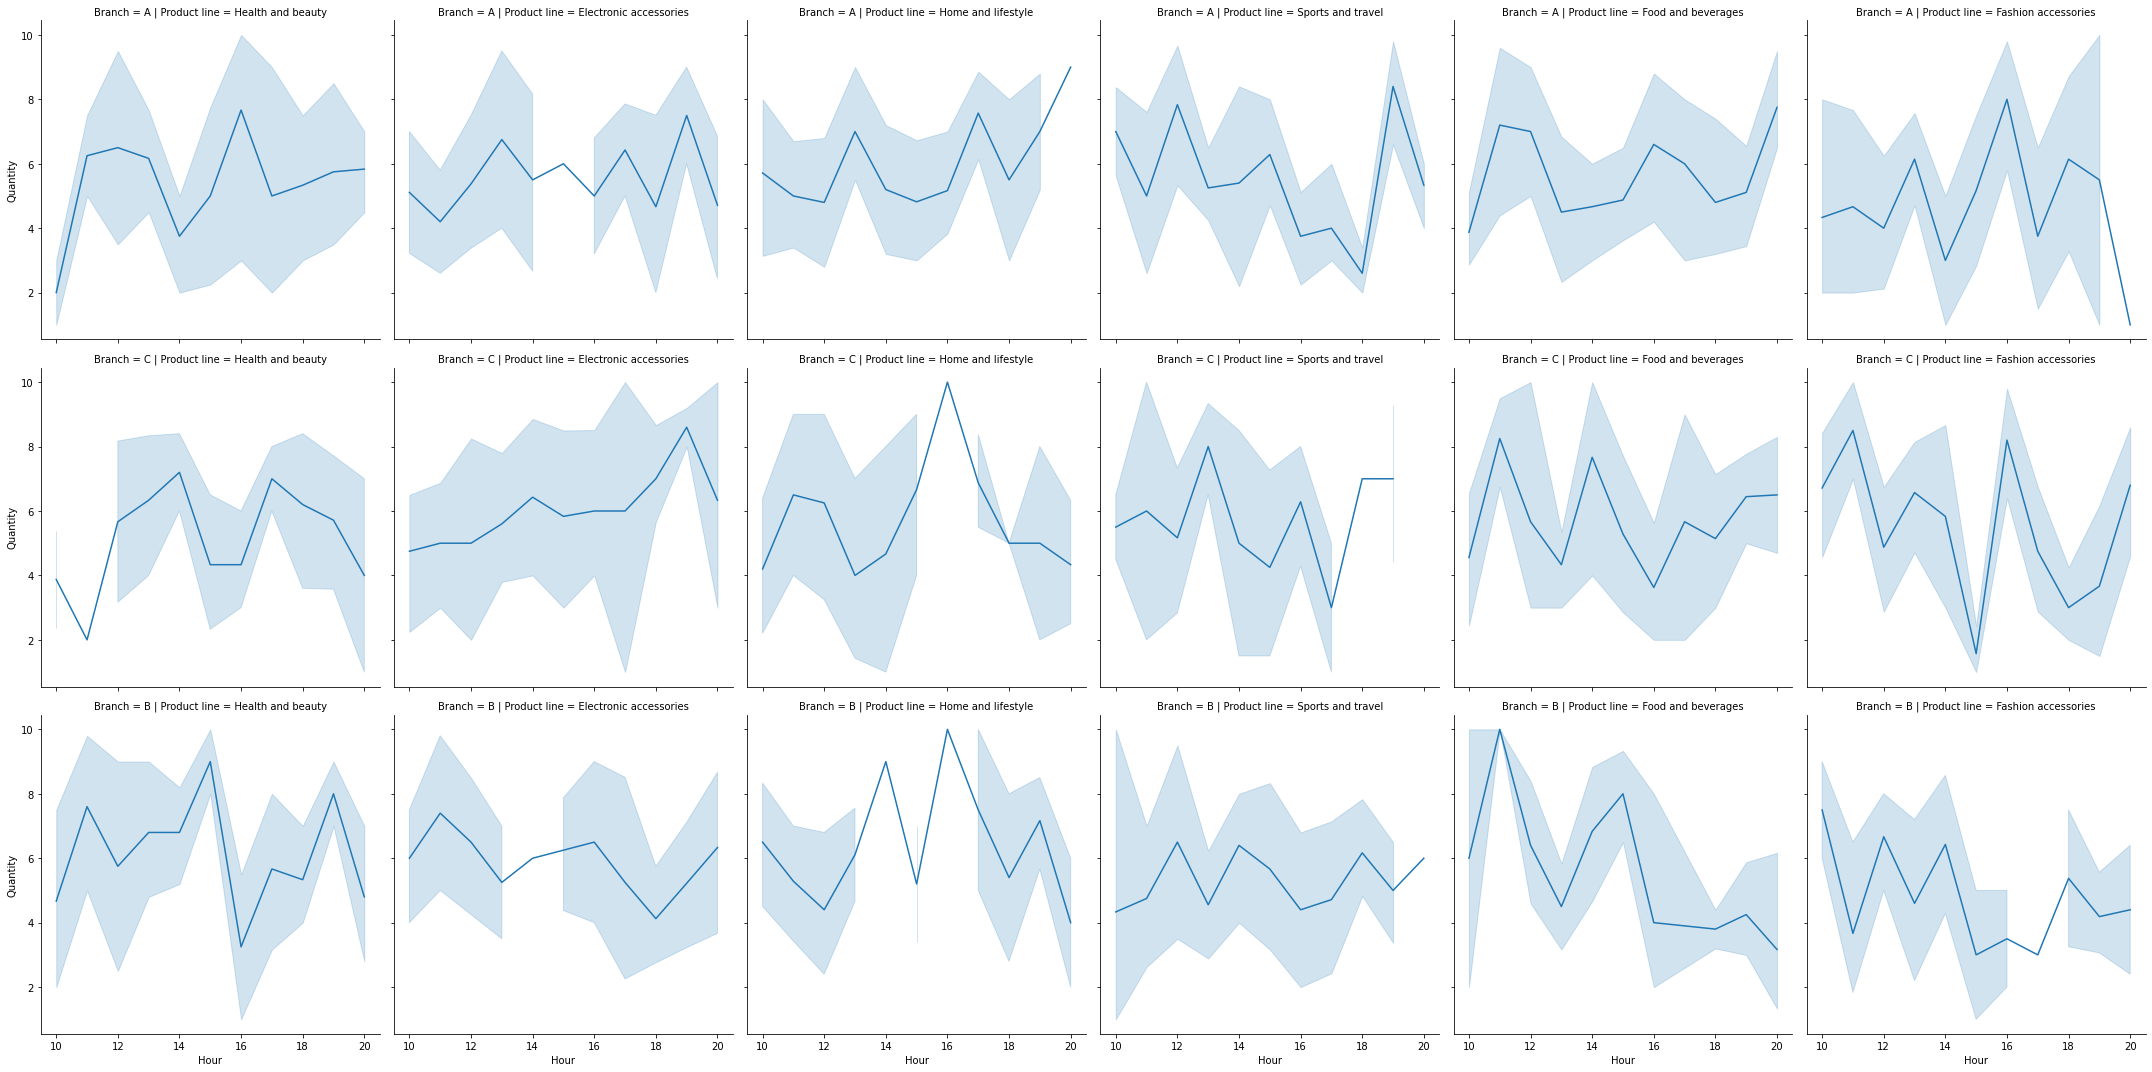

In [31]:
plt.figure(figsize=(20,12))
rel_plot(x_col="Hour",  y_col= 'Quantity', col_name= 'Product line' , row_name= 'Branch', rel_type="line")

In [32]:
### Conclusion-->> From the above plots, we can see that food and beverages sales usually high in all three branches at evening especially around 19:00

In [33]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2021-06-14 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2021-06-14 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,2021-06-14 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,2021-06-14 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,2021-06-14 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,10


### Lets perform Product Analysis

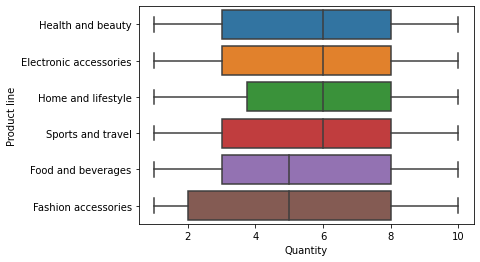

In [34]:
## Quantity distribution of each & every product
boxplot('Quantity','Product line')

In [35]:
##### Conclusion-->> From the above visual, Health and Beauty,Electronic accessories, Home and lifestyle, 
####              Sports and travel have a better average quantity sales that food and beverages as well as Fashion accessories.

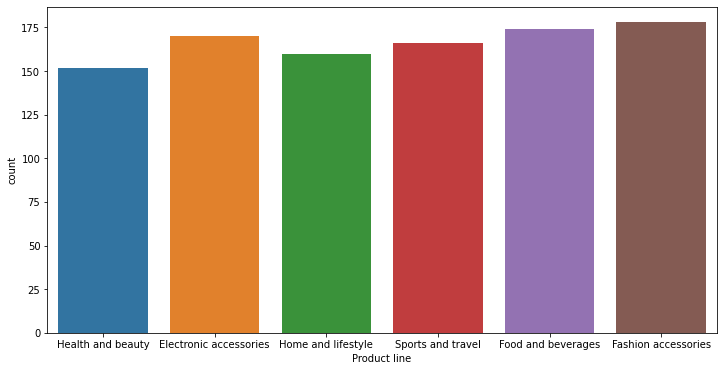

In [36]:
plt.figure(figsize=(12,6))
countplot('Product line')

In [37]:
### From the above,Fashion Accessories is the highest while Health and beauty is the lowest

In [38]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2021-06-14 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2021-06-14 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,2021-06-14 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,2021-06-14 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,2021-06-14 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,10


### relationship between Gross_income & Product_line

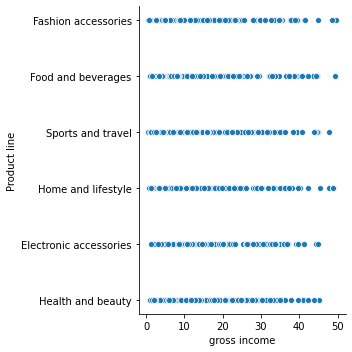

In [39]:

rel_plot('gross income','Product line',rel_type='scatter')

In [40]:
#### Conclusion-->> persons who are going to purchase Fashion Accessories seems to have max. gross income

### Let see how customers make payment in this business

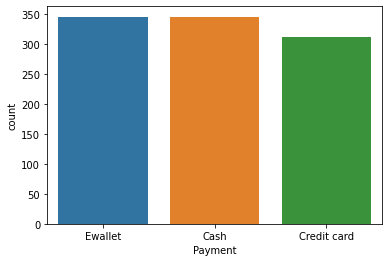

In [41]:
countplot("Payment")

In [42]:
#### Most of the customers pay through the Ewallet and Cash Payment while under 30 percent of them pay with their credit card.
#### We would also like to see this payment type distribution across all the branches

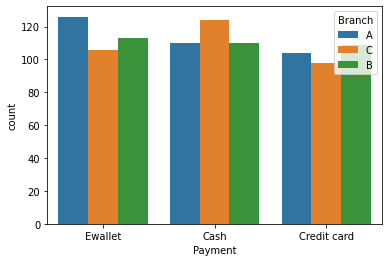

In [43]:
countplot("Payment","Branch")

#### Customer Analysis

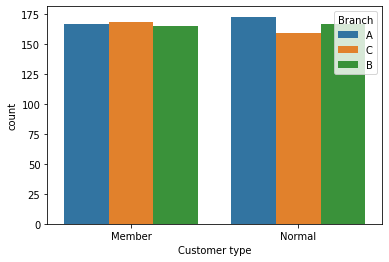

In [44]:
countplot("Customer type",'Branch')

#### Does customer type influences the sales?

In [45]:
sales.groupby(['Customer type'])['Total'].sum()

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

### Do the customer type influence customer rating? Let's find out

Text(0.5, 1.0, 'Customer Type')

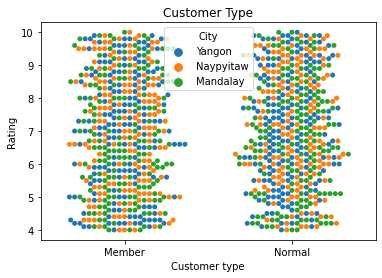

In [46]:
sns.swarmplot(x="Customer type",  y = "Rating",  hue = "City", data =sales).set_title("Customer Type") 

In [47]:
from wordcloud import WordCloud

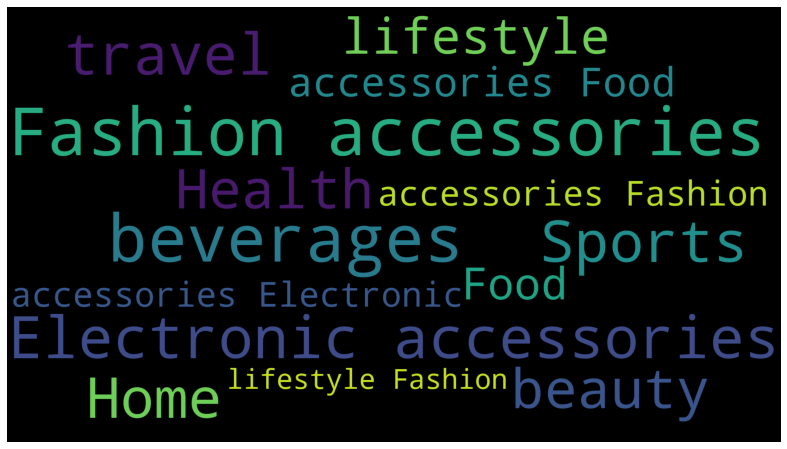

In [48]:
plt.subplots(figsize=(15,8))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(sales["Product line"]))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Building a ML Model

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'day', 'month', 'year', 'Hour'],
      dtype='object')

In [51]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2021-06-14 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2021-06-14 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,2021-06-14 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,2021-06-14 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,2021-06-14 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,10


In [52]:
## Fetch Cog(Cost of Goods) column
X = sales.iloc[:, -8].values.reshape(-1,1)

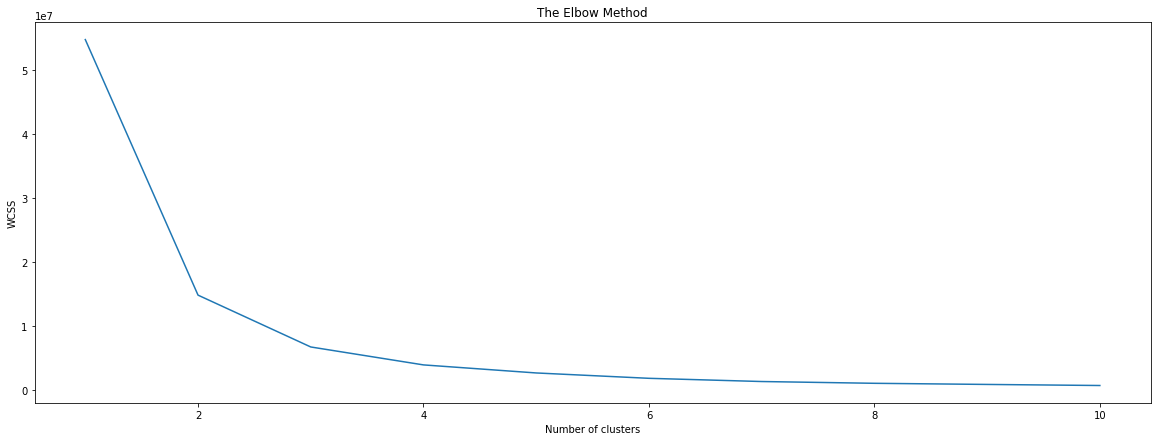

In [53]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(20,7))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [54]:
#### seems to have n=5 ie number of clusters=5

In [56]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [57]:
y_kmeans

array([3, 0, 2, 2, 3, 3, 2, 1, 0, 4, 0, 0, 4, 2, 1, 3, 3, 2, 4, 0, 2, 4,
       0, 4, 4, 2, 0, 4, 2, 4, 3, 1, 3, 4, 2, 0, 2, 3, 2, 4, 0, 0, 2, 1,
       0, 2, 3, 4, 0, 1, 3, 4, 0, 0, 0, 1, 0, 1, 1, 4, 0, 2, 3, 4, 2, 4,
       0, 3, 1, 0, 1, 3, 0, 2, 3, 2, 2, 4, 1, 0, 3, 4, 4, 2, 4, 3, 2, 2,
       0, 2, 4, 2, 4, 3, 0, 0, 1, 0, 4, 3, 0, 1, 4, 2, 4, 1, 4, 2, 2, 1,
       0, 4, 3, 3, 1, 0, 0, 0, 0, 0, 1, 2, 1, 3, 2, 3, 4, 4, 3, 1, 4, 3,
       0, 3, 3, 4, 0, 4, 3, 3, 1, 1, 1, 0, 2, 4, 2, 4, 3, 4, 2, 4, 1, 0,
       3, 2, 0, 4, 1, 3, 2, 0, 2, 4, 2, 2, 1, 1, 2, 3, 2, 2, 4, 2, 4, 2,
       4, 4, 2, 4, 2, 2, 4, 4, 0, 0, 1, 4, 0, 4, 4, 0, 1, 0, 4, 0, 0, 0,
       4, 2, 0, 4, 2, 4, 0, 4, 3, 4, 0, 1, 4, 1, 2, 0, 4, 0, 0, 4, 1, 4,
       4, 2, 0, 0, 0, 4, 3, 0, 3, 3, 4, 0, 1, 4, 3, 4, 0, 4, 0, 0, 4, 0,
       4, 4, 1, 2, 4, 0, 2, 3, 2, 2, 0, 0, 3, 0, 0, 4, 0, 4, 3, 0, 4, 4,
       0, 1, 0, 1, 4, 2, 2, 0, 4, 0, 3, 2, 4, 2, 1, 2, 3, 0, 0, 3, 4, 2,
       0, 4, 2, 3, 2, 4, 0, 0, 4, 4, 0, 3, 4, 0, 4,

In [59]:
sales['cogs']

0      522.83
1       76.40
2      324.31
3      465.76
4      604.17
        ...  
995     40.35
996    973.80
997     31.84
998     65.82
999    618.38
Name: cogs, Length: 1000, dtype: float64

In [58]:
X[y_kmeans == 0]

array([[ 76.4 ],
       [ 72.52],
       [ 57.92],
       [102.04],
       [ 80.6 ],
       [ 66.4 ],
       [ 33.52],
       [ 68.12],
       [ 86.72],
       [112.22],
       [ 30.74],
       [113.58],
       [ 71.48],
       [ 15.43],
       [ 32.32],
       [ 88.68],
       [ 74.22],
       [ 66.94],
       [ 18.33],
       [145.56],
       [101.9 ],
       [ 42.47],
       [ 89.75],
       [ 97.16],
       [ 74.7 ],
       [ 48.71],
       [ 32.98],
       [ 81.06],
       [109.7 ],
       [ 51.36],
       [109.6 ],
       [106.88],
       [139.36],
       [131.55],
       [ 30.41],
       [ 98.88],
       [ 72.17],
       [ 63.69],
       [ 86.38],
       [ 54.24],
       [ 74.07],
       [147.04],
       [102.2 ],
       [ 74.29],
       [ 87.4 ],
       [ 25.29],
       [114.9 ],
       [ 88.85],
       [ 91.11],
       [139.26],
       [ 18.28],
       [123.85],
       [ 59.05],
       [ 12.54],
       [ 86.5 ],
       [148.24],
       [ 31.77],
       [ 87.05],
       [ 66.1 

In [61]:
y_kmeans == 0

array([False,  True, False, False, False, False, False, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True,  True, False, False,  True,
       False, False, False,  True, False, False, False,  True,  True,
        True, False,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False,  True, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True,  True, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False,

In [60]:
X[y_kmeans == 0,0]

array([ 76.4 ,  72.52,  57.92, 102.04,  80.6 ,  66.4 ,  33.52,  68.12,
        86.72, 112.22,  30.74, 113.58,  71.48,  15.43,  32.32,  88.68,
        74.22,  66.94,  18.33, 145.56, 101.9 ,  42.47,  89.75,  97.16,
        74.7 ,  48.71,  32.98,  81.06, 109.7 ,  51.36, 109.6 , 106.88,
       139.36, 131.55,  30.41,  98.88,  72.17,  63.69,  86.38,  54.24,
        74.07, 147.04, 102.2 ,  74.29,  87.4 ,  25.29, 114.9 ,  88.85,
        91.11, 139.26,  18.28, 123.85,  59.05,  12.54,  86.5 , 148.24,
        31.77,  87.05,  66.1 ,  89.69, 119.54,  89.7 ,  28.78,  95.  ,
       130.48,  66.35, 129.  ,  65.8 ,  54.45, 141.88,  42.24,  24.06,
        37.  ,  15.34,  74.86,  62.48,  72.72, 115.36,  88.61,  39.01,
        48.61, 119.68,  79.44, 138.66,  71.15, 139.95,  63.24,  39.42,
        91.56, 129.12, 145.44,  98.7 ,  46.96,  73.5 , 142.25, 142.95,
       144.27, 133.95,  71.95, 135.  ,  30.24,  82.5 ,  74.97, 143.6 ,
       121.92,  94.6 ,  53.22,  75.82, 127.54,  76.82,  79.74, 122.31,
      

#### Visualising Groups

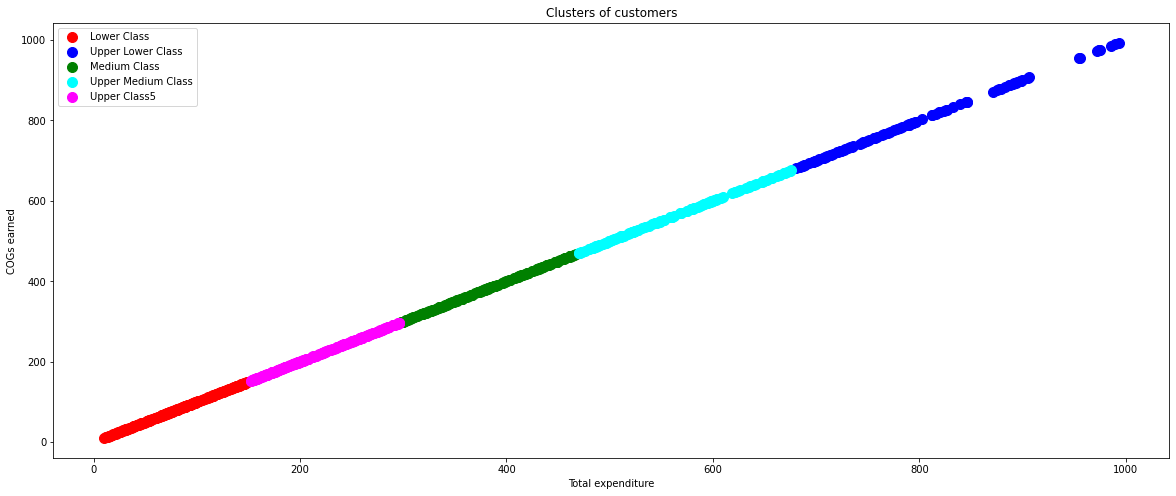

In [62]:
plt.figure(figsize=(20,8))
plt.scatter(X[y_kmeans == 0], X[y_kmeans == 0], s = 100, c = 'red', label = 'Lower Class')
plt.scatter(X[y_kmeans == 1], X[y_kmeans == 1], s = 100, c = 'blue', label = 'Upper Lower Class')
plt.scatter(X[y_kmeans == 2], X[y_kmeans == 2], s = 100, c = 'green', label = 'Medium Class')
plt.scatter(X[y_kmeans == 3], X[y_kmeans == 3], s = 100, c = 'cyan', label = 'Upper Medium Class')
plt.scatter(X[y_kmeans == 4], X[y_kmeans == 4], s = 100, c = 'magenta', label = 'Upper Class5')
plt.title('Clusters of customers')
plt.xlabel('Total expenditure')
plt.ylabel('COGs earned')
plt.legend()
plt.show()

In [ ]:
### Above, Precisely saying, red coloured cluster represents economically lower class of customers and 
### blue cluster represents economically stronger group of customers